<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Filipe D'Avila (NOVO) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Filipe D'Avila do partido NOVO, do qual pode ser visualizado clicando <a href="https://novo.org.br/wp-content/uploads/2022/08/Plano-de-Governo-Davila-1.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANONOVO.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'CreationDate': "D:20220803151209-03'00'",
 'Creator': 'Adobe InDesign 17.3 (Windows)',
 'ModDate': "D:20220803151212-03'00'",
 'Producer': 'Adobe PDF Library 16.0.7',
 'Trapped': 'False'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

36

In [7]:
# Página 1
pdf.pages[0].extract_text()

'Programa de Governo\nUM NOVO BRASIL PARA TODOS\n2023 – 2026'

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

de sair às ruas. Tudo isso significa a prisão dos cidadãos, que permanecerão amar-
rados a um sistema falido.
Nossa  candidatura  tem  uma  visão  das  transformações  necessárias  para 
encararmos o século 21. Estamos nesta campanha para fazer um debate com 
propostas que interessam à sociedade, que impactam a vida de todos. Vamos 
enfrentar os velhos problemas não solucionados há anos com mentalidade dife-
rente e atual. Não olhamos apenas para as ferramentas do Estado, mas para toda 
a economia, com sua força de transformação.
Apresentamos neste plano ideias inovadoras e uma visão radicalmente atual 
sobre os desafios do Brasil. Não é por outra razão que fazemos questão de esta-
belecer como primeira meta do nosso conjunto de propostas a transformação do 
Brasil na primeira grande nação do planeta com a economia totalmente adaptada 
à nova era do carbono zero.
A busca por uma nova economia baseada no respeito ao meio ambiente e na 
redução das emissões de carbono que afetam o clima 

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

Progr


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

programa de governo
um novo brasil para todos
2023 – 2026programa de governo
um novo brasil para todos
2023 – 2026sumário
convite para um novo brasil                  4
meta 1: brasil carbono zero               7
o início de um novo ciclo de geração de emprego,  
renda e investimentos verdes
meta 2: brasil competitivo                  9
abertura total da economia, aumento de produtividade  
e reinserção internacional do brasil
meta 3: brasil para todos                 12
leis mais simples e estado mais eficiente
meta 4: brasil sem fome                  15
a erradicação da pobreza extrema em 4 anos
meta 5: brasil com mais educação              17
estar entre as 20 melhores do mundo em 7 anos
meta 6: brasil com saúde                 21
melhoria do sus com serviços de qualidade e parcerias privadas
meta 7: brasil seguro                  25
combate rigoroso ao crime organizado e à corrupção
meta 8: brasil respeitado                     28
reconstruir a agenda internacional do país e recupe

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

programa de governo
um novo brasil para todos
2023   2026programa de governo
um novo brasil para todos
2023   2026sumário
convite para um novo brasil                  4
meta 1  brasil carbono zero               7
o início de um novo ciclo de geração de emprego   
renda e investimentos verdes
meta 2  brasil competitivo                  9
abertura total da economia  aumento de produtividade  
e reinserção internacional do brasil
meta 3  brasil para todos                 12
leis mais simples e estado mais eficiente
meta 4  brasil sem fome                  15
a erradicação da pobreza extrema em 4 anos
meta 5  brasil com mais educação              17
estar entre as 20 melhores do mundo em 7 anos
meta 6  brasil com saúde                 21
melhoria do sus com serviços de qualidade e parcerias privadas
meta 7  brasil seguro                  25
combate rigoroso ao crime organizado e à corrupção
meta 8  brasil respeitado                     28
reconstruir a agenda internacional do país e recupe

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['programa', 'de', 'governo', 'um', 'novo']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['programa', 'governo', 'novo', 'brasil', 'todos']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('brasil', 78),
 ('saúde', 44),
 ('país', 42),
 ('governo', 37),
 ('estado', 35),
 ('economia', 34),
 ('sistema', 33),
 ('política', 27),
 ('vamos', 27),
 ('educação', 24),
 ('setor', 22),
 ('recursos', 22),
 ('deve', 22),
 ('pobreza', 21),
 ('públicas', 21),
 ('carbono', 20),
 ('anos', 20),
 ('meio', 20),
 ('forma', 20),
 ('acesso', 20),
 ('serviços', 19),
 ('cada', 19),
 ('pública', 19),
 ('propostas', 18),
 ('políticas', 18),
 ('renda', 17),
 ('fim', 17),
 ('todos', 16),
 ('federal', 16),
 ('metas', 16)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,brasil,78
1,saúde,44
2,país,42
3,governo,37
4,estado,35


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

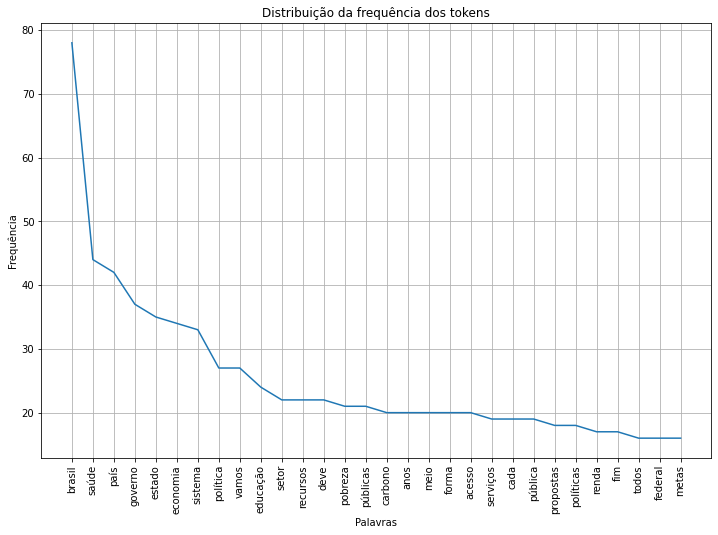

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

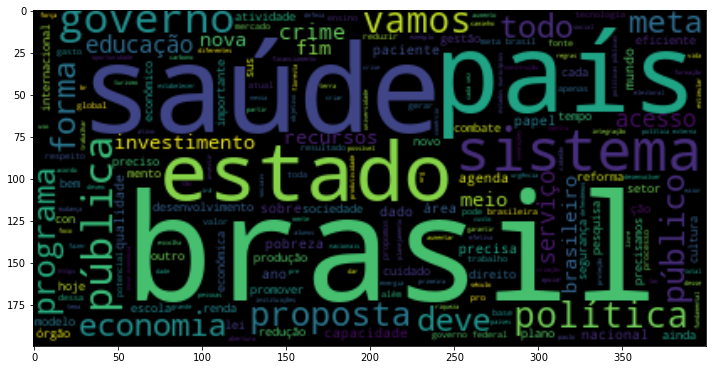

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022